In [17]:
%matplotlib inline
import sys
import numpy
import time
import os
module_path = os.path.join('C:/Users/shihyuch/Anaconda3/Lib/site-packages')
if module_path not in sys.path:
    sys.path.append(module_path)
from MFCC import mfcc_wav
import glob
#import cPickle
import shutil
import audioop
import signal
import csv
import ntpath
from matplotlib.mlab import find
from numpy import array
import matplotlib.pyplot as plt
import scipy.io as sIO
from scipy import linalg as la
from scipy.spatial import distance
import sklearn.svm
import sklearn.decomposition
import sklearn.ensemble
#!/usr/bin/python
import pyaudio
import wave
import numpy as np
import pickle
import sys
sys.path.append('C:/Users/shihyuch/AppData/Local/Programs/Python/Python35-32/Lib/site-packages')
sys.path.append('C:/Users/shihyuch/AppData/Local/Continuum/Anaconda3/Lib/site-packages')
# C:\Users\shihyuch\AppData\Local\Programs\Python\Python35-32\Lib\site-packages
# C:\Users\shihyuch\AppData\Local\Continuum\Anaconda3\Lib\site-packages
import os
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
import scipy.io.wavfile as wav


from matplotlib import pyplot as plt
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
import scipy.io.wavfile as wav
from sklearn.manifold import TSNE
import tensorflow as tf

import sklearn 
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import scipy
import glob
import pysynth as ps
import random
import winsound
import simpleaudio as sa
from pydub import AudioSegment
import tkinter as tk
from tkinter import LEFT, RIGHT
import copy
from monkeylearn import MonkeyLearn
ml = MonkeyLearn('lmao')
# t-SNE is a tool to visualize high-dimensional data. 
from sklearn.manifold import TSNE
%matplotlib inline  
# iPython specific stuff

import IPython.display
from ipywidgets import interact, interactive, fixed

# Packages we're using
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import scipy.ndimage

## 1. Audio Signals Collection

In [2]:

# Make sure num of windows is below the limitation of sample audio signal length
# 5.5 sec = 2446 , 0.001 sec = 2995
Num_Windows = 599

labelsDict = {
    'blues'     :   0,
    'classical' :   1,
    'country'   :   2,
    'disco'     :   3,
    'hiphop'    :   4,
    'jazz'      :   5,
    'metal'     :   6,
    'pop'       :   7,
    'reggae'    :   8,
    'rock'      :   9,
   }

# Download or copy original .wav files. Need to have .wav format
# Convert .au to .wav files
# For loop to convert each file
# C:\Program Files (x86)\sox-14-4-2>for /l %x in (10,1,99) do sox rock.000%x.au -e signed-integer rock.000%x.wav
# .WAV results file at
# C:\Users\shihyuch\AppData\Local\VirtualStore\Program Files (x86)\sox-14-4-2

train_dirs = ["C:/Data Science App/W210/genres_Music_Data_wav/blue_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/classical_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/country_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/disco_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/hiphop_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/jazz_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/metal_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/pop_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/reggae_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/rock_wav"
             ]



## 2 Features Extraction, features space visualization¶

In [3]:
#def mfcc(signal,samplerate=16000,winlen=0.025,winstep=0.01,numcep=13,
#                 nfilt=26,nfft=512,lowfreq=0,highfreq=None,preemph=0.97,
#     ceplifter=22,appendEnergy=True)


labels=[]
features=[]
for train_dir in train_dirs:
    os.chdir(train_dir)
    for wavfile in os.listdir(train_dir):
        #feature data by MFCC for each wavfile
        (rate,sig) = wav.read(wavfile)
        featureAsArray = mfcc(sig,rate,winlen=0.025, numcep=13)
        featureAsArray = featureAsArray[0:Num_Windows]
        features.append(featureAsArray)
        # HOT encoding for music label
        labelName = wavfile.split('.')[0]
        labelAsArray = [0] * len(labelsDict)
        labelAsArray[labelsDict[labelName]] = 1
        labels.append(labelAsArray)


print(features[0])
print(len(features))
print(features[0][0])

#print(labels)
print(len(labels))

[[ 17.01563581 -10.08576996 -14.09521055 ...,   0.1630362    7.72434651
   -7.2288148 ]
 [ 17.02204788  -9.82130003 -15.55125962 ...,  -5.30277511   5.90004114
  -14.82966055]
 [ 16.97786419  -8.64677587 -17.62432852 ...,  -6.44668246   1.79616471
  -17.14924016]
 ..., 
 [ 18.98657601  -4.16760194  -6.71408114 ..., -17.86717331   5.95803886
    1.72919279]
 [ 19.58464605  -2.65699243 -11.95638133 ..., -26.7250314    8.04553766
    2.10592514]
 [ 19.84375404  -4.90958244 -15.02177248 ..., -26.34764336   6.91615924
    2.19069285]]
1000
[ 17.01563581 -10.08576996 -14.09521055   9.401387    -2.87219099
   8.24734406 -25.79222866  -5.73099837 -17.69267603  22.96346519
   0.1630362    7.72434651  -7.2288148 ]
1000


In [4]:
features_10 = []
# Take average for each Genre, but smooth out, no much difference
for i in range(0,10): # mean(A, axis=1)
    features_10.append(np.mean(features[i*100: (i+1)*100], axis=0))
    
print(len(features_10))
print(len(features_10[0]))
#print(features_10.shape) myarray = np.asarray(mylist)
features_10 = np.asarray(features_10)
features_10_reshape = features_10.reshape(10, 599*13)

10
599


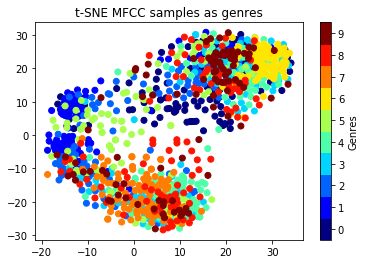

In [69]:
# X = np.array(features_10_reshape)
features_reshape =  np.asarray(features).reshape(1000, 599*13)
X = np.array(features_reshape)
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vis_data = model.fit_transform(X) 


# plot the relationship between two embedded components 
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]
t = []
for label in labels:
    t.append(label.index(1))


plt.scatter(vis_x, vis_y, c=t, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10), label='Genres')
plt.clim(-0.5, 9.5)
plt.title('t-SNE MFCC samples as genres')
plt.show()

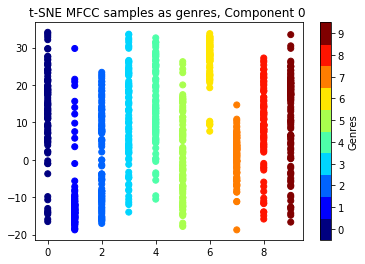

In [70]:
# plot the relationship between Genre at each component
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 0]
vis_x = [[0]*100,[1]*100,[2]*100,[3]*100,[4]*100,[5]*100,[6]*100,[7]*100,[8]*100,[9]*100]

t = []
for label in labels:
    t.append(label.index(1))


plt.scatter(vis_x, vis_y, c=t, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10), label='Genres')
plt.clim(-0.5, 9.5)
plt.title('t-SNE MFCC samples as genres, Component 0 ')
plt.show()

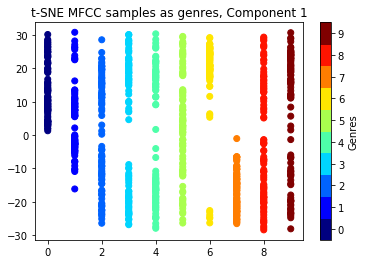

In [71]:
# plot the relationship between Genre at each component
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]
#vis_x = [0,1,2,3,4,5,6,7,8,9]
vis_x = [[0]*100,[1]*100,[2]*100,[3]*100,[4]*100,[5]*100,[6]*100,[7]*100,[8]*100,[9]*100]

t = []
for label in labels:
    t.append(label.index(1))


plt.scatter(vis_x, vis_y, c=t, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10), label='Genres')
plt.clim(-0.5, 9.5)
plt.title('t-SNE MFCC samples as genres, Component 1')
plt.show()


## Features by Tim MFCC (Can Reconstruct Music)

In [ ]:
# Collect spectrogram features
# https://timsainb.github.io/spectrograms-mfccs-and-inversion-in-python.html
import time

start = time.time()


Num_Windows = 200

labelsDict = {
    'blues'     :   0,
    'classical' :   1,
    'country'   :   2,
    'disco'     :   3,
    'hiphop'    :   4,
    'jazz'      :   5,
    'metal'     :   6,
    'pop'       :   7,
    'reggae'    :   8,
    'rock'      :   9,
   }

#train_dirs = ["C:/Data Science App/W210/genres_Music_Data_wav/blue_wav"]


train_dirs = ["C:/Data Science App/W210/genres_Music_Data_wav/blue_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/classical_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/country_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/disco_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/hiphop_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/jazz_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/metal_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/pop_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/reggae_wav",\
              "C:/Data Science App/W210/genres_Music_Data_wav/rock_wav"
             ]


### Parameters ###
fft_size = 1024 # window size for the FFT
step_size = fft_size/16 # distance to slide along the window (in time)
spec_thresh = 4 # threshold for spectrograms (lower filters out more noise)
lowcut = 500 # Hz # Low cut for our butter bandpass filter
highcut = 15000 # Hz # High cut for our butter bandpass filter
# For mels
n_mel_freq_components = 64 # number of mel frequency channels
shorten_factor = 10 # how much should we compress the x-axis (time)
start_freq = 300 # Hz # What frequency to start sampling our melS from 
end_freq = 8000 # Hz # What frequency to stop sampling our melS from

sample_time = 10
# if np.shape(data)[0]/float(rate) > sample_time:
    

labels=[]
features=[]
folder = 0
for train_dir in train_dirs:
    os.chdir(train_dir)
    print(folder)
    folder = folder + 1
    for wavfile in os.listdir(train_dir):
        #feature data by MFCC for each wavfile
        (rate,sig) = wav.read(wavfile)
        data = mfcc_wav.butter_bandpass_filter(sig, lowcut, highcut, 1.5 * rate, order=10)
        data = data[0:rate*sample_time] 
        wav_spectrogram = mfcc_wav.pretty_spectrogram(data.astype('float64'), fft_size = fft_size, step_size = step_size,
                                     log = True, thresh = spec_thresh)
        
        mel_filter, mel_inversion_filter = mfcc_wav.create_mel_filter(fft_size = fft_size,
                                                        n_freq_components = n_mel_freq_components,
                                                        start_freq = start_freq,
                                                        end_freq = end_freq)
        
        featureAsArray = mfcc_wav.make_mel(wav_spectrogram, mel_filter, shorten_factor = shorten_factor)
        featureAsArray = featureAsArray[:, 0:Num_Windows]
        features.append(featureAsArray)
        # HOT encoding for music label
        labelName = wavfile.split('.')[0]
        labelAsArray = [0] * len(labelsDict)
        labelAsArray[labelsDict[labelName]] = 1
        labels.append(labelAsArray)


print(features[0])
print("-" * 20)
print(features[1])
print(len(features))
print(features[0][0])

#print(labels)
print(len(labels))

end = time.time()
print(end - start)


In [ ]:
# save feature data as a file


with open("C:/Data Science App/W210/Features and Labels/Spectogram_MFCC.txt", "wb") as fp:   #Pickling
     pickle.dump(features, fp)
 

with open("C:/Data Science App/W210/Features and Labels/Spectogram_MFCC.txt", "rb") as fp:   # Unpickling
     b = pickle.load(fp)

print(b[0])
print(len(b))
print(b[0][0])

## Reconstruct Music from MFCC

In [18]:
### Parameters ###
fft_size = 1024 # window size for the FFT
step_size = fft_size/16 # distance to slide along the window (in time)
spec_thresh = 4 # threshold for spectrograms (lower filters out more noise)
lowcut = 500 # Hz # Low cut for our butter bandpass filter
highcut = 15000 # Hz # High cut for our butter bandpass filter
# For mels
n_mel_freq_components = 64 # number of mel frequency channels
shorten_factor = 10 # how much should we compress the x-axis (time)
start_freq = 300 # Hz # What frequency to start sampling our melS from 
end_freq = 8000 # Hz # What frequency to stop sampling our melS from

In [22]:
# Grab your wav and filter it
mywav = 'C:/Data Science App/W210/genres_Music_Data_wav/blue_wav/blues.00025.wav'
rate, data = wavfile.read(mywav)
data = mfcc_wav.butter_bandpass_filter(data, lowcut, highcut, 1.5 * rate, order=10)
# Only use a short clip for our demo
sample_time = 20
if np.shape(data)[0]/float(rate) > sample_time:
    data = data[0:rate*sample_time] 
print('Length in time (s): ', np.shape(data)[0]/float(rate))
# Play music
IPython.display.Audio(data=data, rate=rate)

Length in time (s):  20.0


In [24]:
# Features of wave spectrogram
"""
    creates a spectrogram
    log: take the log of the spectrgram
    thresh: threshold minimum power for log spectrogram
"""
wav_spectrogram = mfcc_wav.pretty_spectrogram(data.astype('float64'), fft_size = fft_size, step_size = step_size,
                                     log = True, thresh = spec_thresh)
# Invert from the spectrogram back to a waveform
recovered_audio_orig = mfcc_wav.invert_pretty_spectrogram(wav_spectrogram, fft_size = fft_size,
                                            step_size = step_size, log = True, n_iter = 10)
IPython.display.Audio(data=recovered_audio_orig, rate=rate) # play the audio

In [25]:
# Build MFCC 
mel_filter, mel_inversion_filter = mfcc_wav.create_mel_filter(fft_size = fft_size,
                                                        n_freq_components = n_mel_freq_components,
                                                        start_freq = start_freq,
                                                        end_freq = end_freq)
mel_spec = mfcc_wav.make_mel(wav_spectrogram, mel_filter, shorten_factor = shorten_factor)
# From MFCC to WAV 
mel_inverted_spectrogram = mfcc_wav.mel_to_spectrogram(mel_spec, mel_inversion_filter,
                                                spec_thresh=spec_thresh,
                                                shorten_factor=shorten_factor)
inverted_mel_audio = mfcc_wav.invert_pretty_spectrogram(np.transpose(mel_inverted_spectrogram), fft_size = fft_size,
                                            step_size = step_size, log = True, n_iter = 10)
IPython.display.Audio(data=inverted_mel_audio, rate=rate)

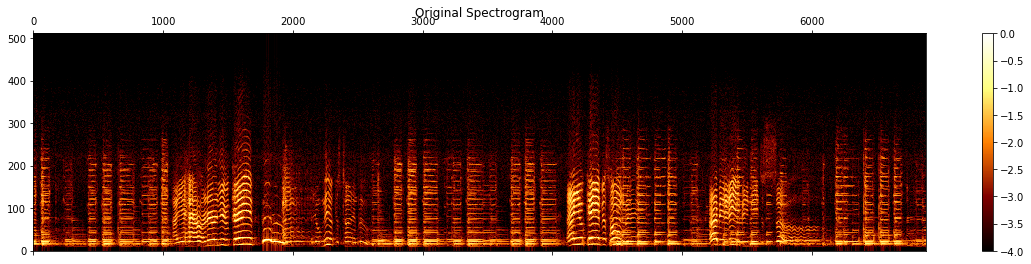

In [26]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot, origin='lower')
fig.colorbar(cax)
plt.title('Original Spectrogram')

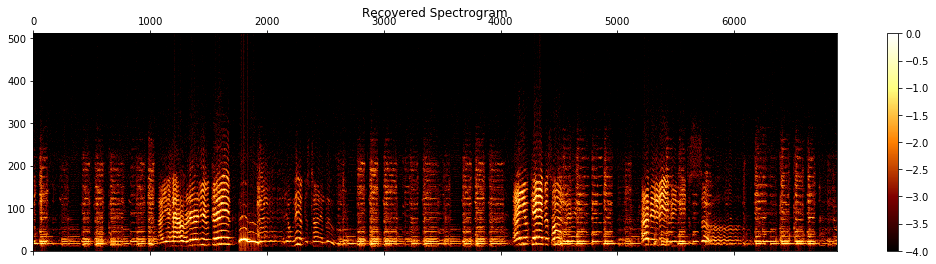

In [27]:
# Make a spectrogram of the inverted audio (for visualization)
inverted_spectrogram = pretty_spectrogram(recovered_audio_orig.astype('float64'), fft_size = fft_size, 
                                   step_size = step_size, log = True, thresh = spec_thresh)
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(18,4))
cax = ax.matshow(np.transpose(inverted_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot, origin='lower')
fig.colorbar(cax)
plt.title('Recovered Spectrogram')

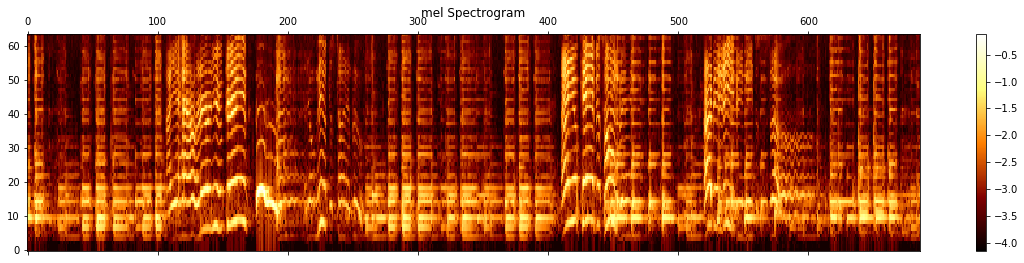

In [31]:
# plot the compressed spec
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))

cax = ax.matshow(mel_spec.astype('float64'), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot, origin='lower')
fig.colorbar(cax)
plt.title('mel Spectrogram')

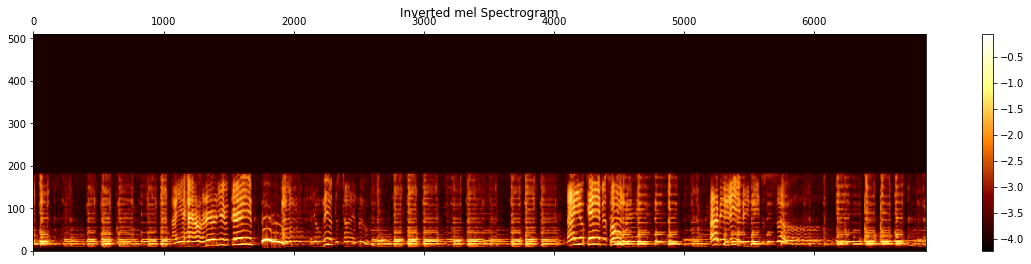

In [32]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
cax = ax.matshow(mel_inverted_spectrogram.astype('float64'), cmap=plt.cm.afmhot, origin='lower', aspect='auto',interpolation='nearest')
fig.colorbar(cax)
plt.title('Inverted mel Spectrogram')